In [15]:
import numpy as np
import pandas as pd
import plotnine as pn

from datetime import datetime, date

from sciterra.mapping.atlas import Atlas
from sciterra.mapping.cartography import Cartographer
from sciterra.vectorization.scibert import SciBERTVectorizer

In [16]:
atlas_dir = "outputs/atlas_s2-7-20-23_uncentered_imeletal/"

In [17]:
# load atlas
# convert all datetimes to dates
# filter all pubs without citations
# measure density
# measure citations per year
# plot density against citation frequency

In [18]:
atl = Atlas.load(atlas_dir)

No bad_ids to read, skipping.


In [19]:
len(atl)

16354

In [20]:
vectorizer = SciBERTVectorizer(device="mps")
crt = Cartographer(vectorizer=vectorizer)

Using device: mps.


In [21]:
densities = crt.measure_topography(atl, metric="density")

Computing density for 16354 publications.


100%|██████████| 16354/16354 [00:10<00:00, 1514.81it/s]


In [22]:
citations_per_year = [ 
    atl[id].citation_count / (2023 - atl[id].publication_date.year) if atl[id].publication_date.year < 2023 else 0
    for id in atl.projection.index_to_identifier
]
citations_per_year

[26.2,
 8.5,
 11.466666666666667,
 3.5,
 0.75,
 19.09090909090909,
 20.4,
 1.5,
 14.5,
 128.25,
 65.54545454545455,
 1.5714285714285714,
 2.6666666666666665,
 23.857142857142858,
 6.0,
 0.5,
 1.0,
 23.2,
 6.571428571428571,
 3.75,
 7.0,
 22.625,
 13.0,
 1.0,
 12.816901408450704,
 16.666666666666668,
 26.205479452054796,
 5.333333333333333,
 16.714285714285715,
 0.0,
 0.0,
 0.75,
 1.5769230769230769,
 3.5,
 6.428571428571429,
 0.0,
 0.3076923076923077,
 0.11764705882352941,
 309.8888888888889,
 0.25,
 1.0,
 3.2222222222222223,
 0.0,
 1.0588235294117647,
 0.12,
 4.3125,
 1.6666666666666667,
 0.6,
 1.0,
 1.8,
 0.125,
 7.0,
 29.357142857142858,
 0.8461538461538461,
 1.75,
 1.1538461538461537,
 1.2222222222222223,
 11.0,
 0.5,
 1.5,
 2.0,
 4.0,
 0.0,
 6.333333333333333,
 3.625,
 12.6,
 0.42857142857142855,
 0.0625,
 1.2222222222222223,
 1.0,
 0,
 0.0,
 0.7777777777777778,
 0.5454545454545454,
 30.058823529411764,
 4.0,
 0.16666666666666666,
 0.0,
 0.5,
 0.0,
 3.5714285714285716,
 35.84,
 1.

In [23]:
# count zeros, i.e. where citation_count was zero
len(citations_per_year) - np.count_nonzero(citations_per_year)

3107

In [24]:
df = pd.DataFrame(
    densities,
    columns=["density"],
)
df["citations_per_year"] = citations_per_year
df

,density,citations_per_year
0,12.334017,26.200000
1,12.569195,8.500000
2,13.434385,11.466667
3,13.204854,3.500000
4,13.083671,0.750000
...,...,...
16349,13.262735,0.000000
16350,13.744198,0.285714
16351,12.541898,3.857143
16352,12.767569,0.454545


geom_point : Removed 37 rows containing missing values.
geom_smooth : Removed 10 rows containing missing values.


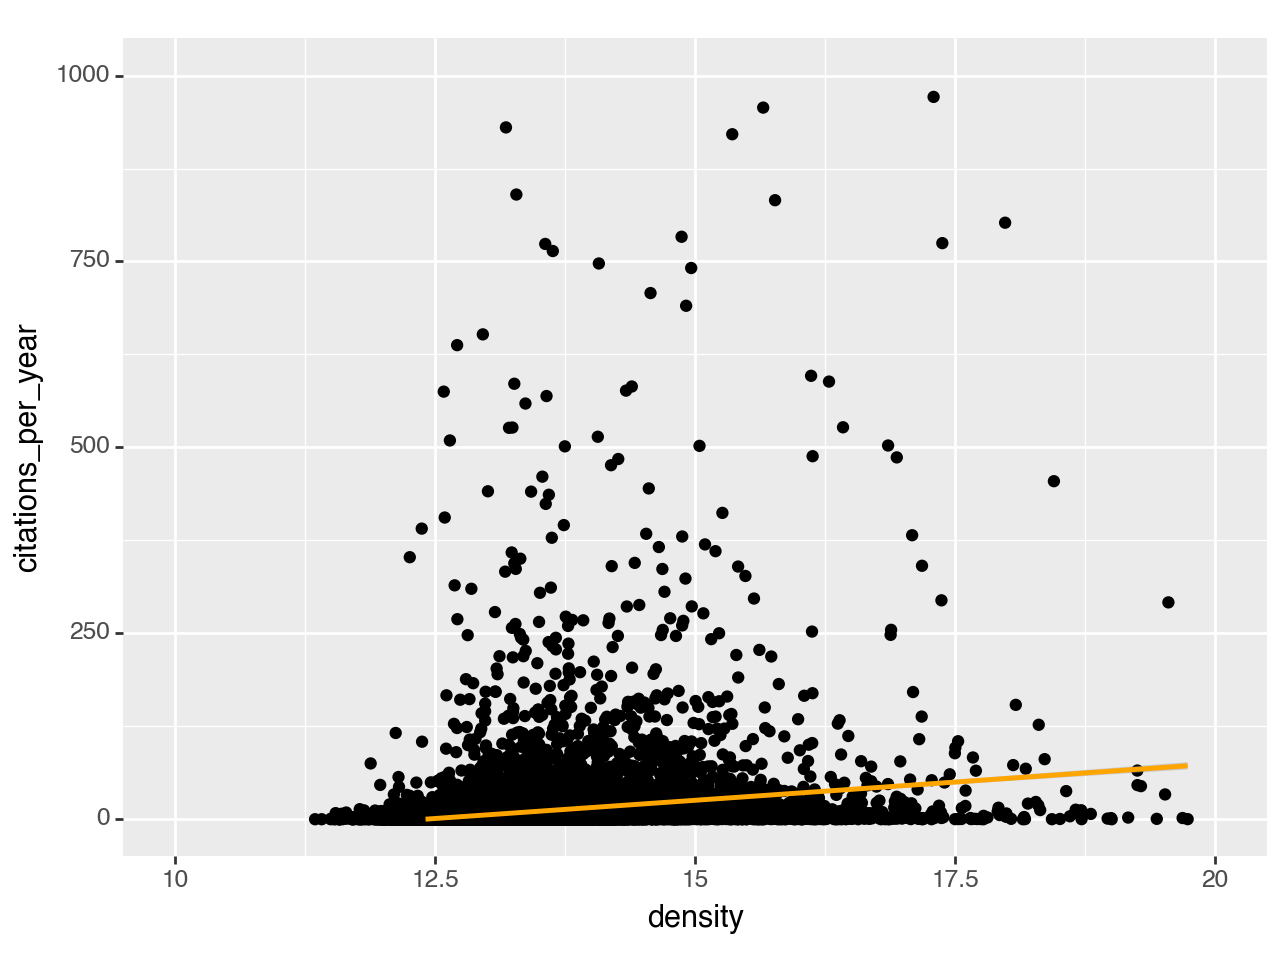

<Figure Size: (640 x 480)>

In [29]:
(
    pn.ggplot(
        df,
        mapping=pn.aes(x="density", y="citations_per_year")
    )
    + pn.geom_point()
    + pn.geom_smooth(color="orange")
    + pn.xlim(10, 20)
    + pn.ylim(0, 1000)
)

divide by zero encountered in log10
geom_point : Removed 4230 rows containing missing values.


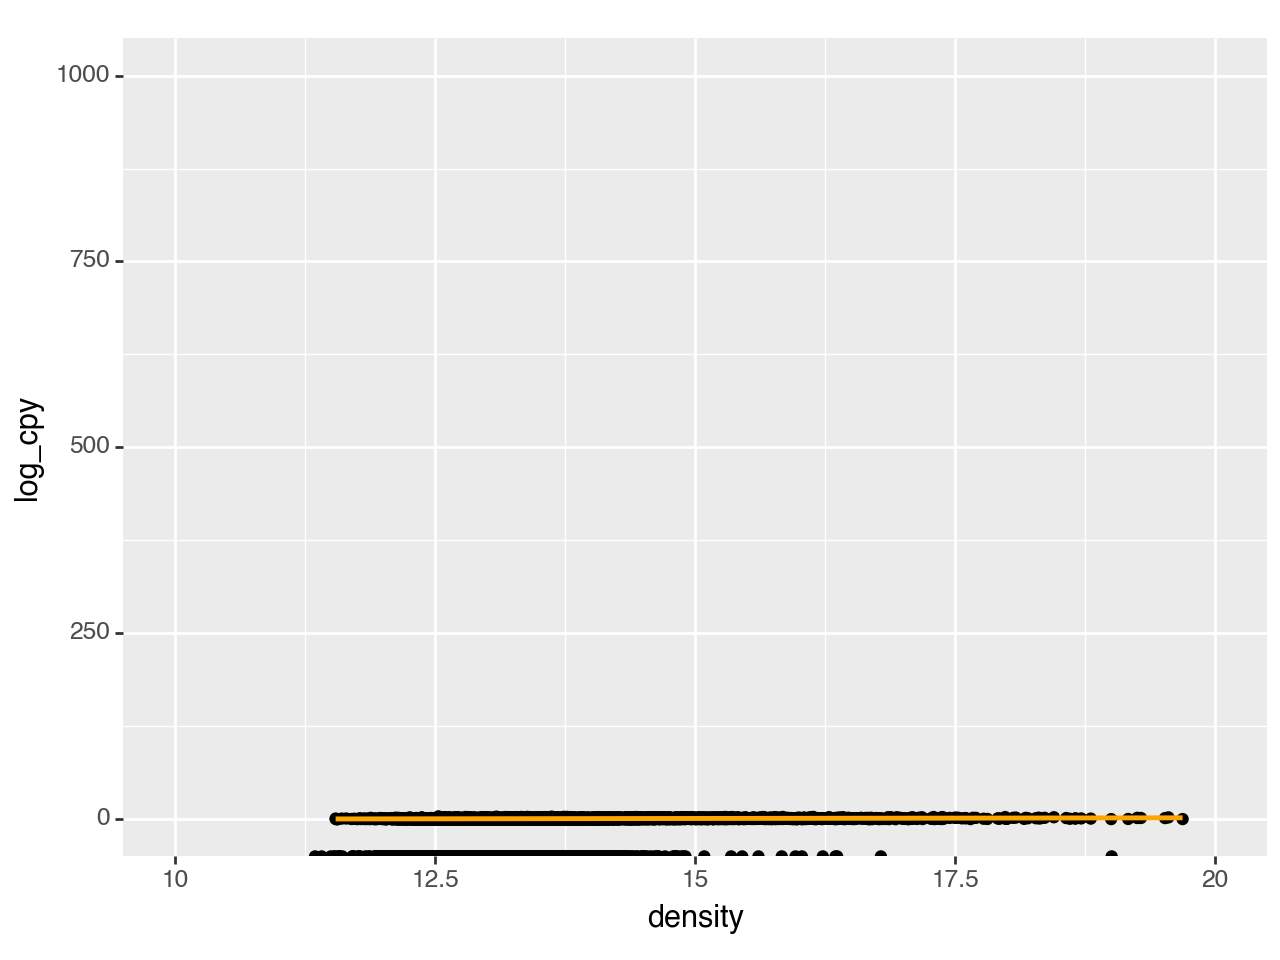

<Figure Size: (640 x 480)>

In [30]:
# log?
df["log_cpy"] = np.log10(citations_per_year)
(
    pn.ggplot(
        df,
        mapping=pn.aes(x="density", y="log_cpy")
    )
    + pn.geom_point()
    + pn.geom_smooth(color="orange")
    + pn.xlim(10, 20)
    # + pn.ylim(0, 1000)
)